In [1]:
%matplotlib inline

import cv2
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from PIL import Image
import random

import dense_correspondence_manipulation.utils.utils as utils

utils.add_dense_correspondence_to_python_path()
utils.set_cuda_visible_devices([0])

from dense_correspondence.evaluation.evaluation import DenseCorrespondenceEvaluation
from dense_correspondence.dataset.spartan_dataset_masked import SpartanDataset
from dense_correspondence.dataset.dense_correspondence_dataset_masked import ImageType, DenseCorrespondenceDataset
import logging
logging.basicConfig(level=logging.INFO)

DCD = DenseCorrespondenceDataset

random.seed(100)


/home/manuelli/code/modules/dense_correspondence_manipulation/utils/transformations.py:1912: UserWarning: failed to import module _transformations
  warnings.warn('failed to import module %s' % name)


setting CUDA_VISIBLE_DEVICES =  0,


In [2]:
dataset = SpartanDataset.make_default_10_scenes_drill()

Using SpartanDataset:
   - in train mode
   - number of scenes: 7
   - total images:     1383


In [3]:
scene_name = "06_drill_long_downsampled"
img_a_idx = 0
# img_b_idx = 201
img_b_idx = 2489

rgb_a, depth_a, mask_a, pose_a = dataset.get_rgbd_mask_pose(scene_name, img_a_idx)
rgb_a = np.array(rgb_a)

rgb_b, depth_b, mask_b, pose_b = dataset.get_rgbd_mask_pose(scene_name, img_b_idx)
rgb_b = np.array(rgb_b)

print rgb_b.shape



INFO:root:Loading pose data for scene 06_drill_long_downsampled


(480, 640, 3)


type(des1) <type 'numpy.ndarray'>
des1.shape (148, 128)
des1.dtype float32


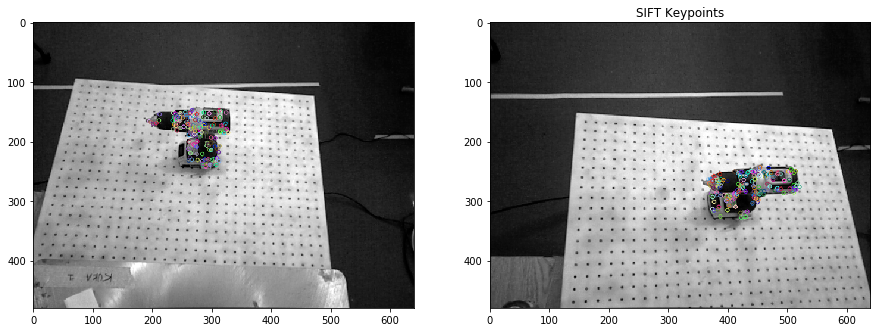

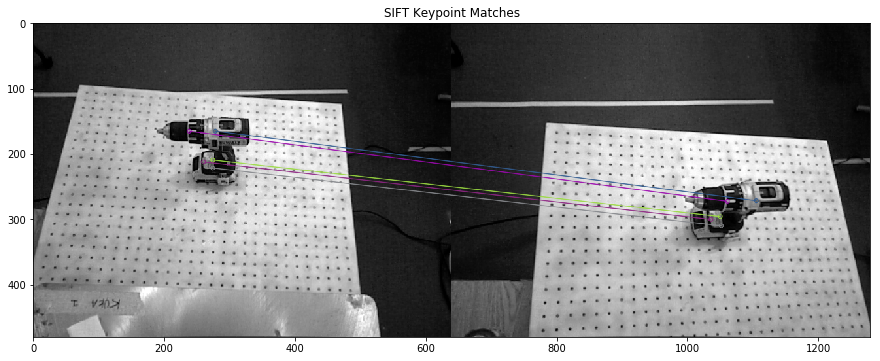

In [4]:
DCE = DenseCorrespondenceEvaluation
dce = DenseCorrespondenceEvaluation.make_default()
return_data = DCE.single_image_pair_sift_analysis(dataset, scene_name, img_a_idx, img_b_idx)
kp1 = return_data['kp1']

/usr/local/lib/python2.7/dist-packages/torch/nn/modules/module.py:482: UserWarning: src is not broadcastable to dst, but they have the same number of elements.  Falling back to deprecated pointwise behavior.
  own_state[name].copy_(param)


type(des1) <type 'numpy.ndarray'>
des1.shape (148, 128)
des1.dtype float32


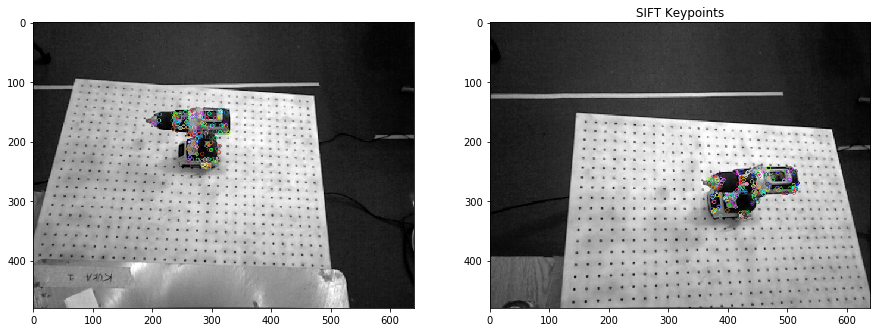

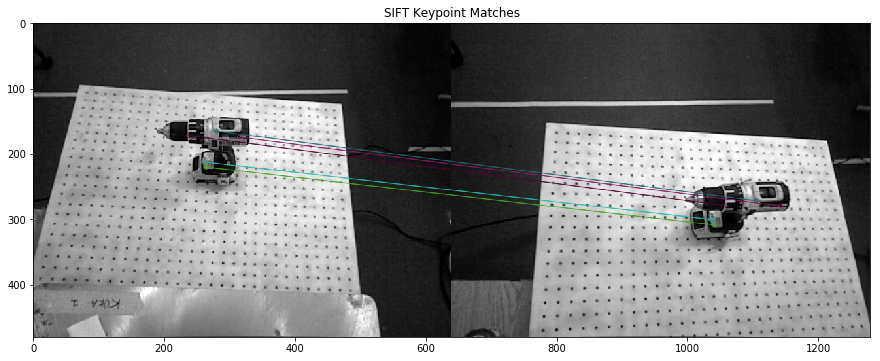

/usr/local/lib/python2.7/dist-packages/torch/nn/functional.py:1423: UserWarning: nn.functional.upsample_bilinear is deprecated. Use nn.functional.upsample instead.
  warnings.warn("nn.functional.upsample_bilinear is deprecated. Use nn.functional.upsample instead.")


*des.dtype float32


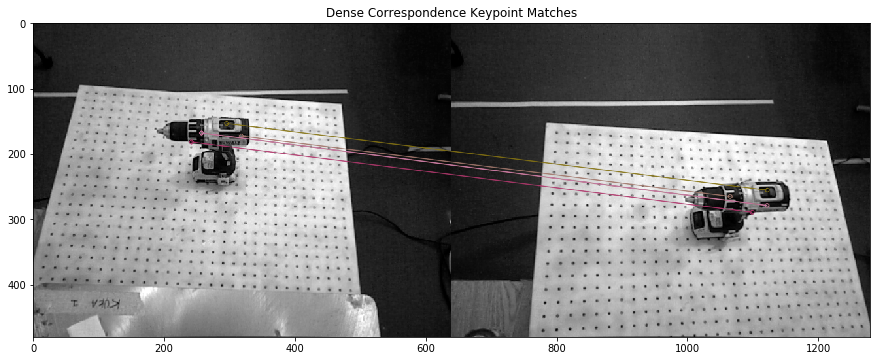

In [5]:
dcn = dce.load_network_from_config("10_scenes_drill")
data = DCE.single_image_pair_keypoint_analysis(dcn, dataset, scene_name, img_a_idx, img_b_idx)